<a href="https://colab.research.google.com/github/sinhadeepak1115/tensorflow-deep-learning/blob/main/ML_02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification with TensorFlow


In [62]:

import tensorflow as tf
print(tf.__version__)

2.12.0


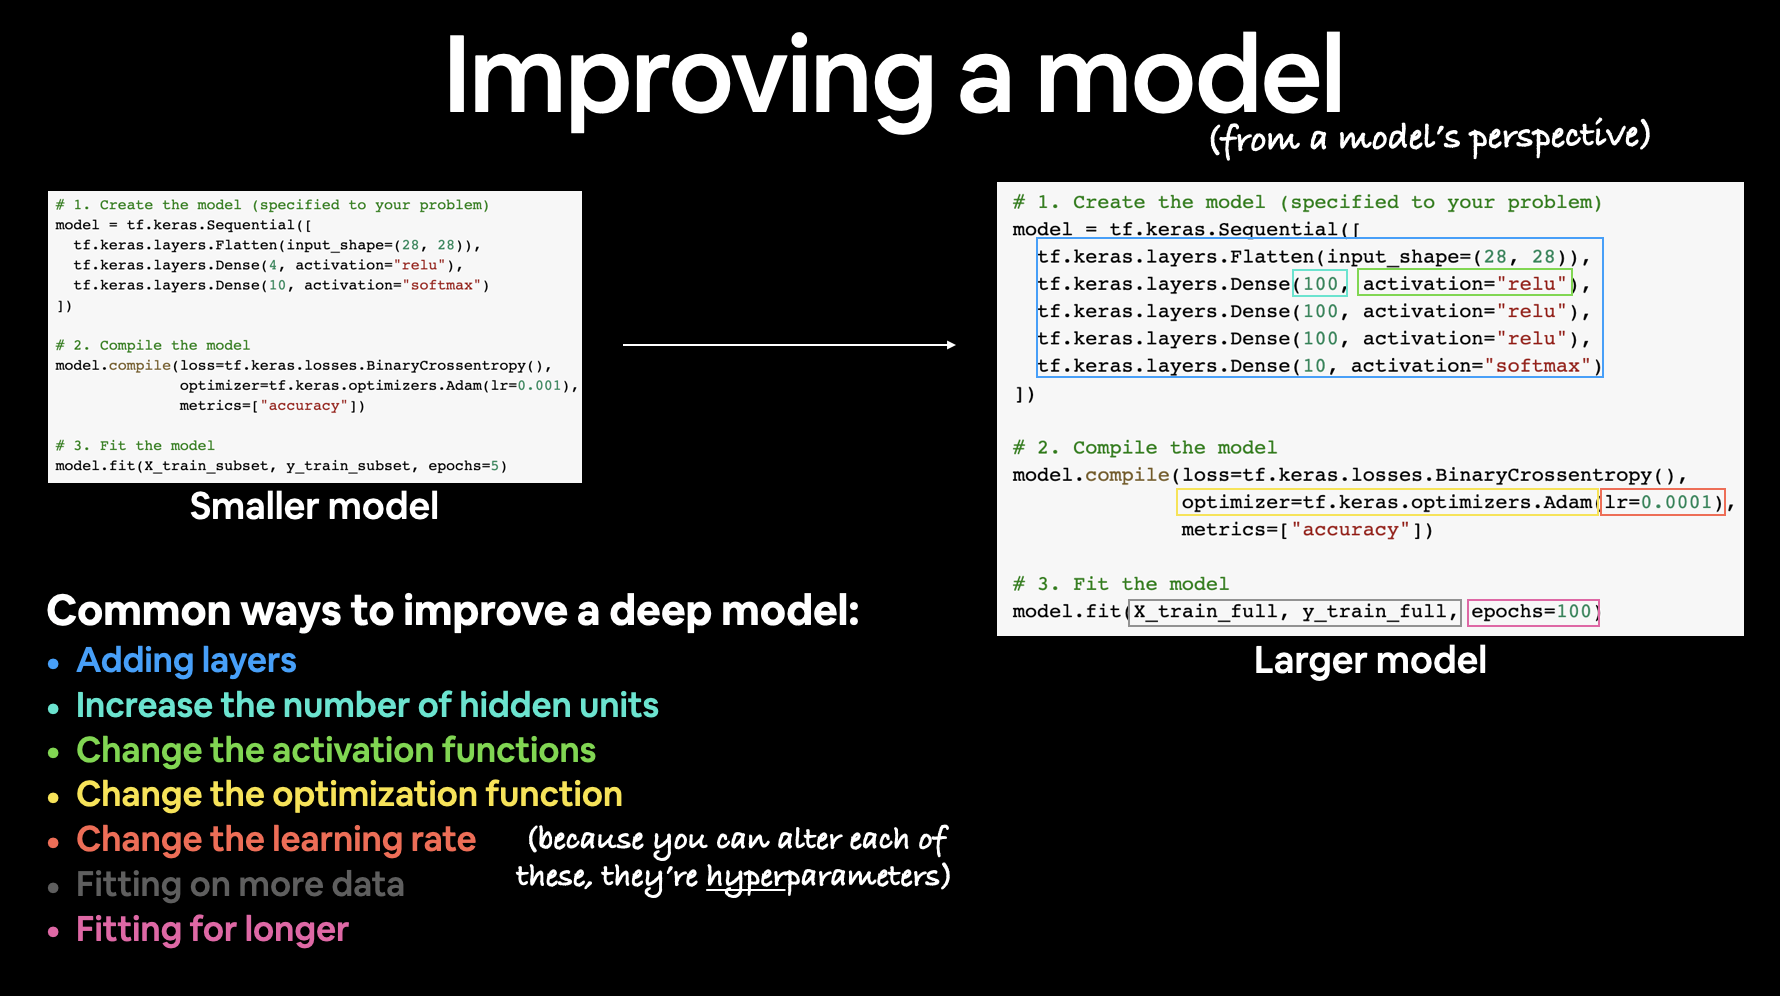



In [63]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [64]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [65]:
y[:10]
     


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [66]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [67]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

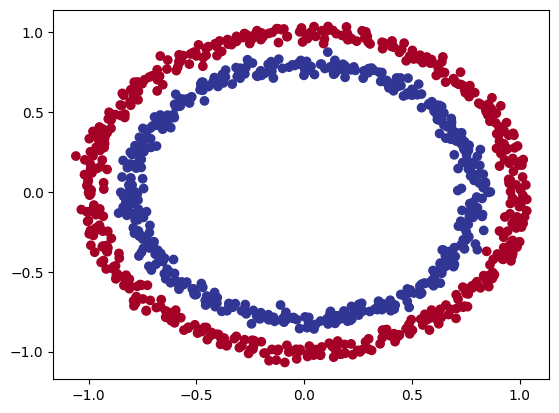

In [68]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [69]:
X.shape, y.shape

((1000, 2), (1000,))

In [70]:
len(X), len(y)

(1000, 1000)

In [71]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [72]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.0688 - accuracy: 0.4880
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4677 - accuracy: 0.4860
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2455 - accuracy: 0.4750
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 2.5767 - accuracy: 0.4810
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.4920


In [73]:
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [74]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [75]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932410597801208, 0.5]

In [76]:

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.7146 - accuracy: 0.4520
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5160
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4760
Epoch 11/

In [77]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
     

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


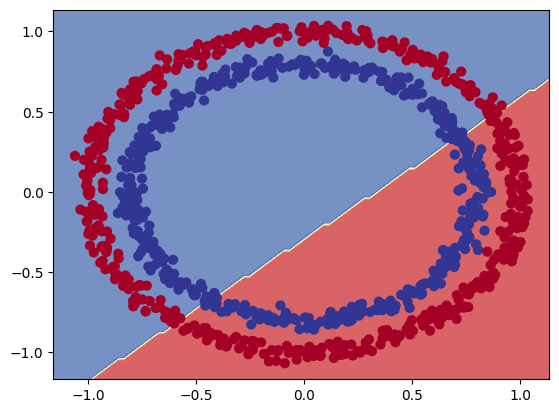

In [78]:
plot_decision_boundary(model_3, X, y)

In [79]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
y_min, y_max


(-1.1677683182718437, 1.1360036756154805)

In [80]:

# # Set random seed
# tf.random.set_seed(42)

# # Create some regression data
# X_regression = np.arange(0, 1000, 5)
# y_regression = np.arange(100, 1100, 5)

# # Split it into training and test sets
# X_reg_train = X_regression[:150]
# X_reg_test = X_regression[150:]
# y_reg_train = y_regression[:150]
# y_reg_test = y_regression[150:]

# # Fit our model to the data
# # Note: Before TensorFlow 2.7.0, this line would work
# # model_3.fit(X_reg_train, y_reg_train, epochs=100)

# # After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

In [81]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 381.3739 - mae: 381.3739
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 300.6274 - mae: 300.6274
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 220.6713 - mae: 220.6713
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 135.2616 - mae: 135.2616
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 54.1873 - mae: 54.1873
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 67.3653 - mae: 67.3653
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 71.4462 - mae: 71.4462
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 50.5506 - mae: 50.5506
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 44.6432 - mae: 44.6432
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0395 - mae: 47.0395
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


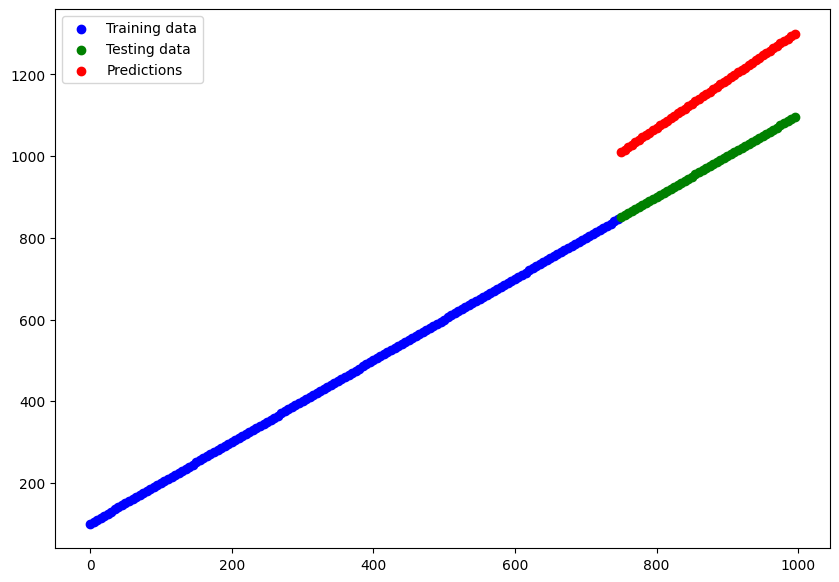

In [82]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [83]:

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.3296 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3257 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3238 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3223 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3122 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2716 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2293 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2229 - accuracy: 0.4820
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2067 - accuracy: 0.4820
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1923 - accuracy: 0.4820
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


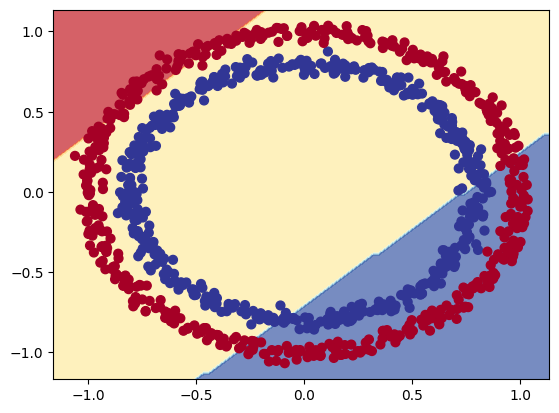

In [84]:
plot_decision_boundary(model_4, X, y)

In [85]:

# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [86]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
		tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
		optimizer=tf.keras.optimizers.Adam(lr=0.001),
		metrics=['accuracy'])

model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.0172 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8439 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6266 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 2.3878 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0736 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3526 - accuracy: 0.4590
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0103 - accuracy: 0.4160
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9569 - accuracy: 0.3990
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9286 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9076 - accuracy: 0.4300
Epoch 11/

In [87]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5945 - accuracy: 0.8250


[0.5945084691047668, 0.824999988079071]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


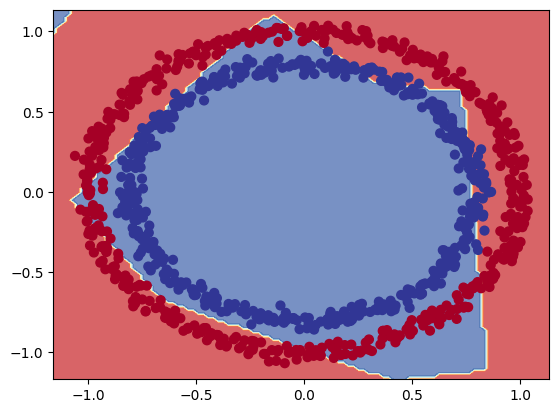

In [88]:
plot_decision_boundary(model_6, X, y)

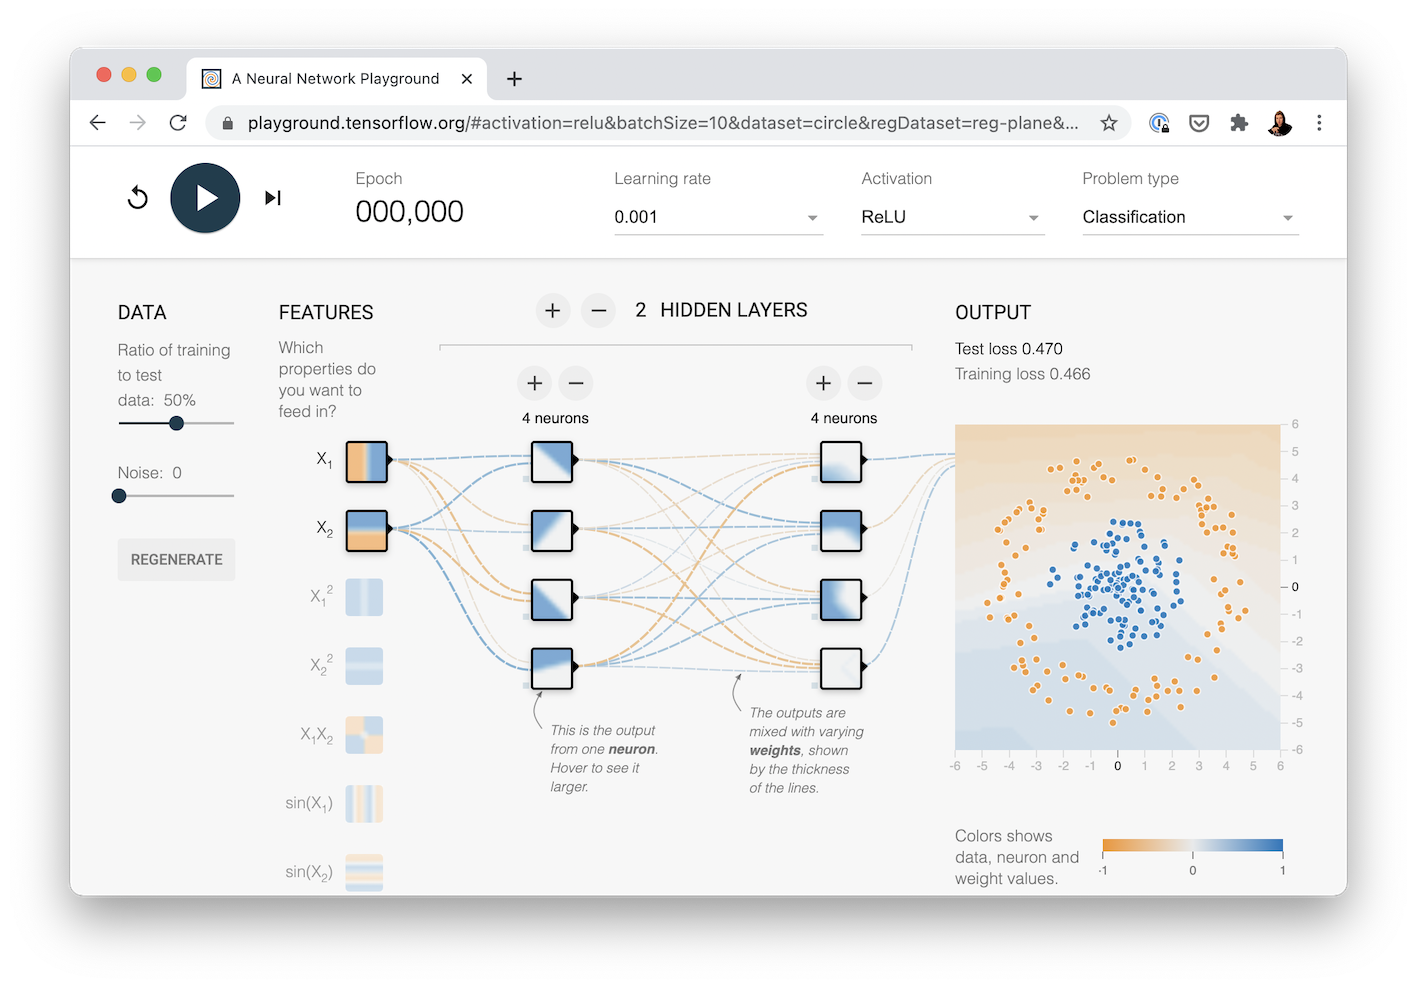

In [106]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
		tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
		optimizer=tf.keras.optimizers.Adam(lr=0.001),
		metrics=['accuracy'])

model_7.fit(X,y, epochs=100,verbose=0)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


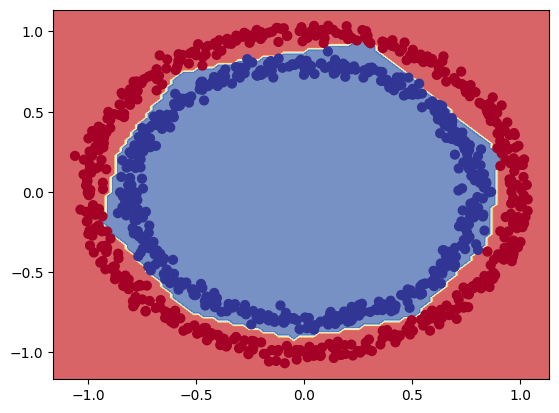

In [107]:
plot_decision_boundary(model_7, X, y)

In [91]:
A = tf.cast(tf.range(-10, 10), tf.float32)

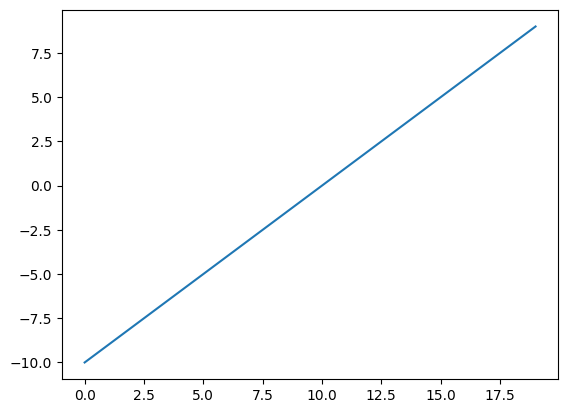

In [92]:
plt.plot(A);

In [93]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
sigmoid(A)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [94]:
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

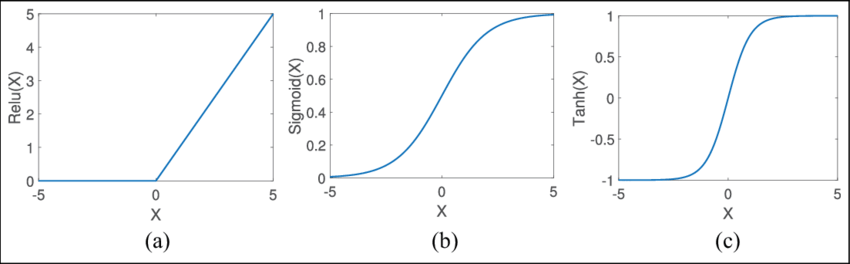

In [111]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=175)

Epoch 1/175
25/25 [==============================] - 1s 3ms/step - loss: 0.7144 - accuracy: 0.4825
Epoch 2/175
25/25 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.4888
Epoch 3/175
25/25 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5013
Epoch 4/175
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 5/175
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5025
Epoch 6/175
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5050
Epoch 7/175
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5125
Epoch 8/175
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5113
Epoch 9/175
25/25 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5188
Epoch 10/175
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5200
Epoch 11/

In [112]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9600
Model loss on the test set: 0.22971616685390472
Model accuracy on the test set: 96.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


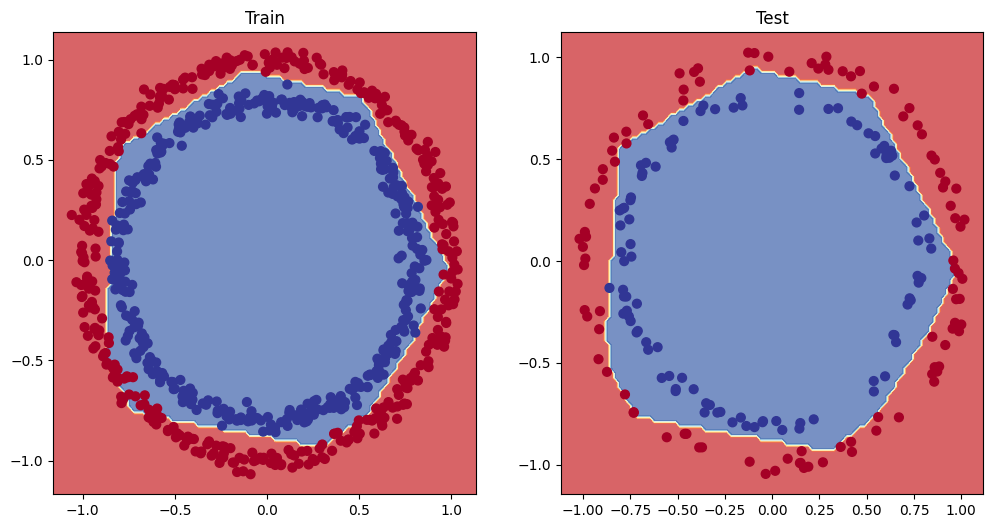

In [113]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [115]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 3s 8ms/step - loss: 0.6957 - accuracy: 0.4863
Epoch 2/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6949 - accuracy: 0.4825
Epoch 3/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4538
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4888
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4925
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4925
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.4988
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.4963
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5038
Epoch 10/200
25/25 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.5113
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


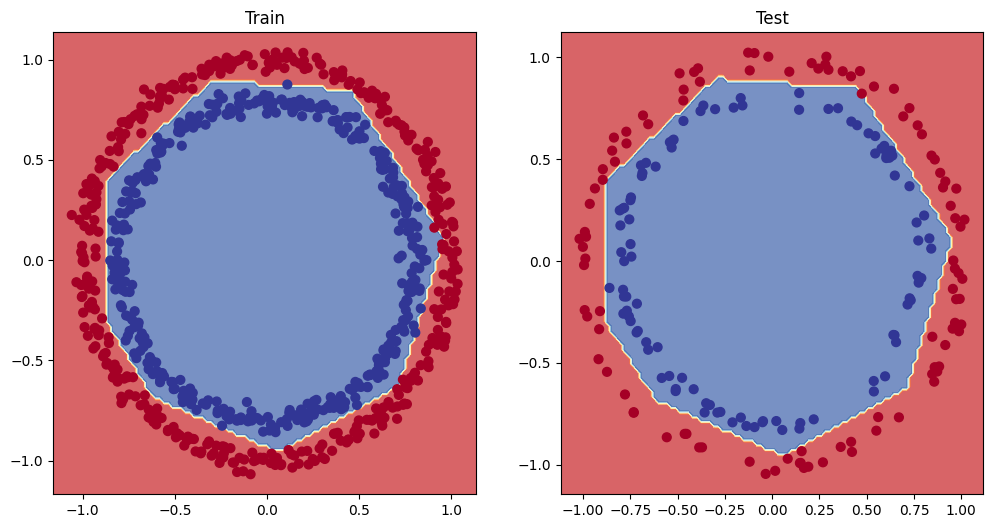

In [116]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

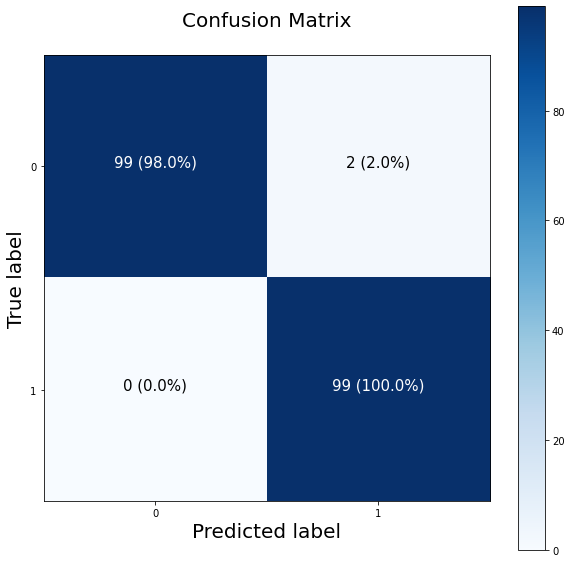

In [131]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [133]:
confusion_matrix(y_test,tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

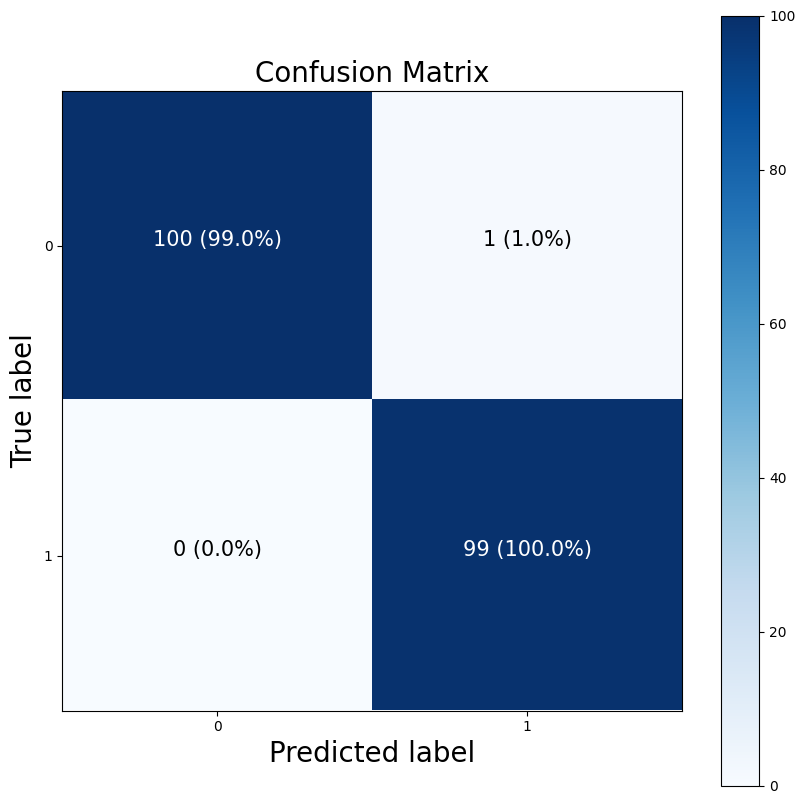

In [137]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
     

 # Working with a larger example (multiclass classification)

In [174]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [175]:
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [176]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

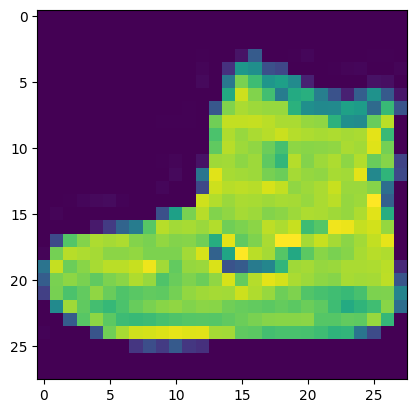

In [177]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [178]:
train_labels[3]

3

In [179]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

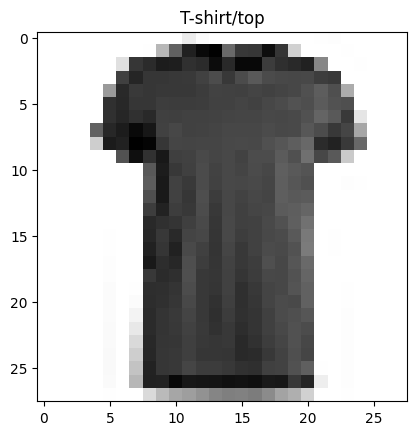

In [180]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

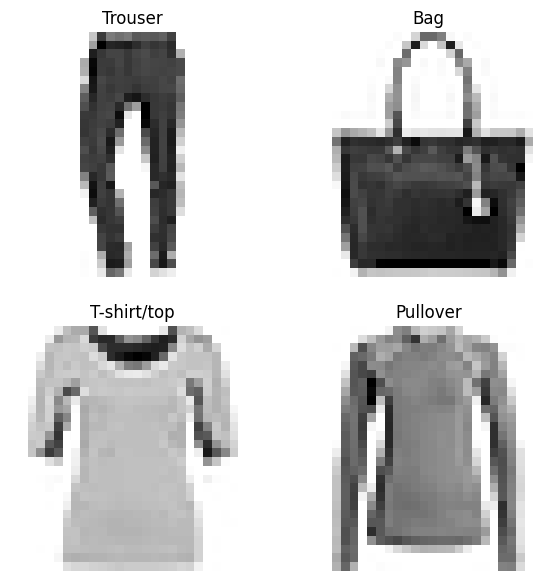

In [181]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap = plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
    

In [182]:
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =["accuracy"])
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0929 - accuracy: 0.1834 - val_loss: 1.6634 - val_accuracy: 0.2953
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5619 - accuracy: 0.3430 - val_loss: 1.4935 - val_accuracy: 0.3900
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4840 - accuracy: 0.3738 - val_loss: 1.5082 - val_accuracy: 0.3505
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4808 - accuracy: 0.3499 - val_loss: 1.4512 - val_accuracy: 0.3512
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4303 - accuracy: 0.3562 - val_loss: 1.4217 - val_accuracy: 0.3597
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4154 - accuracy: 0.3737 - val_loss: 1.4115 - val_accuracy: 0.3828
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4071 - accuracy: 0.3846 - val_loss: 1.4206 - val_accuracy:

In [183]:
model_11.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_97 (Dense)            (None, 4)                 3140      
                                                                 
 dense_98 (Dense)            (None, 4)                 20        
                                                                 
 dense_99 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [186]:

# Divide train and test images by the maximum value (normalize it)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [187]:

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2324 - accuracy: 0.5272 - val_loss: 117.9772 - val_accuracy: 0.5516
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8207 - accuracy: 0.6755 - val_loss: 131.9313 - val_accuracy: 0.5876
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7575 - accuracy: 0.6963 - val_loss: 156.3683 - val_accuracy: 0.5816
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7298 - accuracy: 0.7070 - val_loss: 153.5047 - val_accuracy: 0.5902
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7114 - accuracy: 0.7186 - val_loss: 156.8053 - val_accuracy: 0.6038
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6994 - accuracy: 0.7247 - val_loss: 141.7709 - val_accuracy: 0.6166
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6924 - accuracy: 0.7291 - val_loss: 148.1719 -

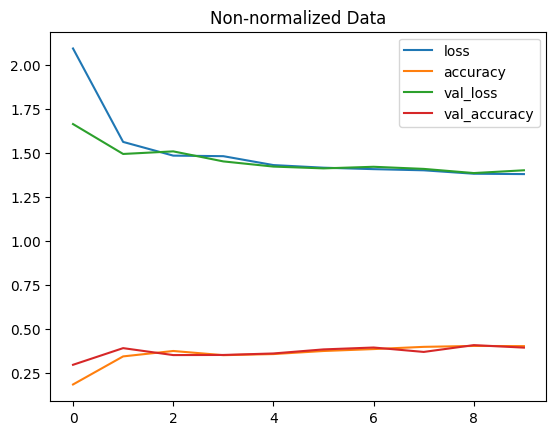

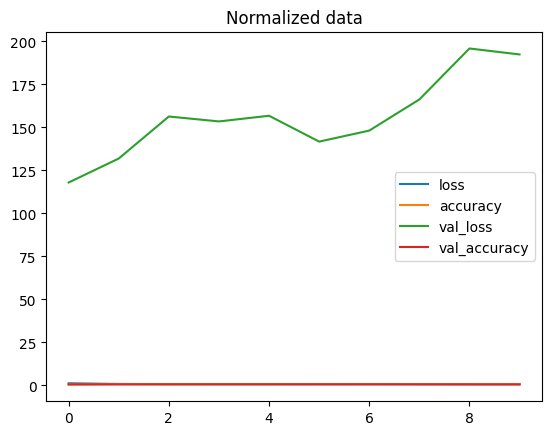

In [188]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");